# Classification of Dry Beans based on several physical aspects

## Attribute Information:

###### 1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
###### 2.) Perimeter (P): Bean circumference is defined as the length of its border.
######  3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
######   4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
######   5.) Aspect ratio (K): Defines the relationship between L and l.
######  6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
######  7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
###### 8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
###### 9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
###### 10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
###### 11.)ShapeFactor4 (SF4) The shape factor is the perimeter of the contour around the area of interest divided by the square root of the area.
###### 12.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 #    Let's import the datatset with all the features of  bean seeds

In [2]:
beans =pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
beans

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

### let's have a look at the summary features of the  beans that are being observed

In [4]:
beans.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

##### Turns out some columns contain information that I do not  need 
##### So let's simply remove them from our analysis

In [5]:
beans.drop(["Eccentricity", "ShapeFactor1", "ShapeFactor2", "ShapeFactor2"], inplace = True, axis=1)

In [6]:
beans

pd.set_option('display.max_columns', None)
beans

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
0           28715     190.141097  0.763923  0.988856   0.958027     0.913358   
1           29172     191.272750  0.783968  0.984986   0.887034     0.953861   
2           29690     193.410904  0.778113  0.989559   0.947849     0.908774   
3           30724     195.467062  0.782681  0.976696   0.903936     0.928329   
4           30417     195.896503  0.773098  0.990893   0.984877     0.970516   
...           ...            ...       ...       ...        ...          ...   
13606       42508     231.515799  0.714574  0.990331   0.916603     0.801865   
13607       42494     231.526798  0.799943  0.990752   0.922015     0.822252   
13608       42569     231.631261  0.729932  0.989899   0.918424     0.822730   
13609       42667     231.653248  0.705389  0.987813   0.907906     0.817457   
13610       42600     231.686223  0.788962  0.989648   0.888380     0.784997   

       ShapeFactor3  ShapeFactor4     Class  
0          0.834222      0.998724     SEKER  
1          0.909851      0.998430     SEKER  
2          0.825871      0.999066     SEKER  
3          0.861794      0.994199     SEKER  
4          0.941900      0.999166     SEKER  
...             ...           ...       ...  
13606      0.642988      0.998385  DERMASON  
13607      0.676099      0.998219  DERMASON  
13608      0.676884      0.996767  DERMASON  
13609      0.668237      0.995222  DERMASON  
13610      0.616221      0.998180  DERMASON  

[13611 rows x 14 columns]

##### let's now see how many bean seeds of every category have been used in this study

In [7]:
beans.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

##### We can look at it visually to see what it  it looks like

<AxesSubplot:xlabel='Class', ylabel='count'>

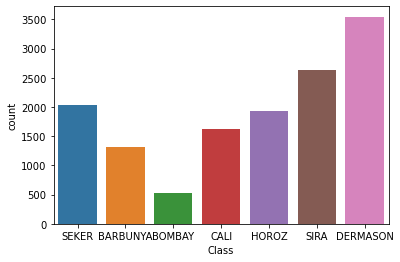

In [8]:
sns.countplot(x ='Class', data = beans)

#### Now let's have a look average area per bean Class

In [9]:
beans.groupby(["Class"])['Area',].agg("mean")

Area
Class                  
BARBUNYA   69804.133132
BOMBAY    173485.059387
CALI       75538.211043
DERMASON   32118.710942
HOROZ      53648.508817
SEKER      39881.299951
SIRA       44729.128604

##### Now Let's see if the bean type with the largest area has something interesting to it

In [10]:
beans.groupby(["Class"])['Area','roundness','ShapeFactor4', 'Compactness', 'Compactness', 'EquivDiameter'].agg('mean')

<ipython-input-10-7ad78f7f8cb5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  beans.groupby(["Class"])['Area','roundness','ShapeFactor4', 'Compactness', 'Compactness', 'EquivDiameter'].agg('mean')


Area  roundness  ShapeFactor4  Compactness  Compactness  \
Class                                                                        
BARBUNYA   69804.133132   0.800200      0.995739     0.805001     0.805001   
BOMBAY    173485.059387   0.864421      0.991841     0.792622     0.792622   
CALI       75538.211043   0.845934      0.990584     0.756703     0.756703   
DERMASON   32118.710942   0.908114      0.996914     0.819110     0.819110   
HOROZ      53648.508817   0.794420      0.991926     0.700880     0.700880   
SEKER      39881.299951   0.944508      0.998383     0.896841     0.896841   
SIRA       44729.128604   0.884652      0.995385     0.797345     0.797345   

          EquivDiameter  
Class                    
BARBUNYA     297.311018  
BOMBAY       468.941426  
CALI         309.535280  
DERMASON     201.683813  
HOROZ        260.730715  
SEKER        224.948441  
SIRA         238.335316

##### Is there any correlation between different features

In [11]:
beans.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  ConvexArea  EquivDiameter    Extent  Solidity  \
Area                 0.241735    0.999939       0.984968  0.054345 -0.196585   
Perimeter            0.385276    0.967689       0.991380 -0.021160 -0.303970   
MajorAxisLength      0.550335    0.932607       0.961733 -0.078062 -0.284302   
MinorAxisLength     -0.009161    0.951339       0.948539  0.145957 -0.155831   
AspectRation         1.000000    0.243301       0.303647 -0.370184 -0.267754   
ConvexArea           0.243301    1.000000       0.985226  0.052564 -0.206191   
EquivDiameter        0.303647    0.985226       1.000000  0.028383 -0.231648   
Extent              -0.370184    0.052564       0.028383  1.000000  0.191389   
Solidity            -0.267754   -0.206191      -0.231648  0.191389  1.000000   
roundness           -0.766979   -0.362083      -0.435945  0.344411  0.607150   
Compactness         -0.987687   -0.269922      -0.327650  0.354212  0.303766   
ShapeFactor3        -0.978592   -0.274024      -0.330389  0.347624  0.307662   
ShapeFactor4        -0.449264   -0.362049      -0.392512  0.148502  0.702163   

                 roundness  Compactness  ShapeFactor3  ShapeFactor4  
Area             -0.357530    -0.268067     -0.272145     -0.355721  
Perimeter        -0.547647    -0.406857     -0.408435     -0.429310  
MajorAxisLength  -0.596358    -0.568377     -0.568185     -0.482527  
MinorAxisLength  -0.210344    -0.015066     -0.019326     -0.263749  
AspectRation     -0.766979    -0.987687     -0.978592     -0.449264  
ConvexArea       -0.362083    -0.269922     -0.274024     -0.362049  
EquivDiameter    -0.435945    -0.327650     -0.330389     -0.392512  
Extent            0.344411     0.354212      0.347624      0.148502  
Solidity          0.607150     0.303766      0.307662      0.702163  
roundness         1.000000     0.768086      0.763126      0.472149  
Compactness       0.768086     1.000000      0.998686      0.484436  
ShapeFactor3      0.763126     0.998686      1.000000      0.484274  
ShapeFactor4      0.472149     0.484436      0.484274      1.000000

##### Let's look at the outliers inthe dataset

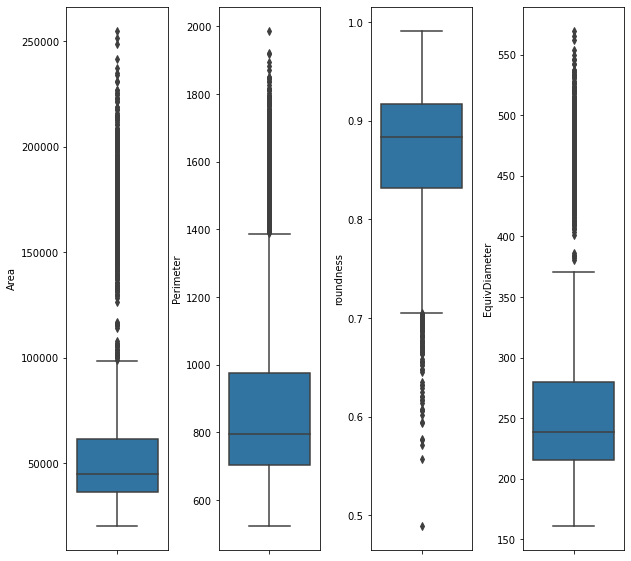

In [12]:
fig, ax = plt.subplots(1,4, figsize=(10, 10))
sns.boxplot(y=beans.Area, ax=ax[0])
sns.boxplot(y=beans.Perimeter, ax=ax[1])
sns.boxplot(y=beans.roundness, ax=ax[2])
sns.boxplot(y=beans.EquivDiameter, ax=ax[3])
plt.subplots_adjust(wspace=0.5)

##### Let's look isolate the rows with outlying values now and check again ijf the valuer are still very scarttered 

In [13]:
beans = beans.loc[beans.Area <= 100000]

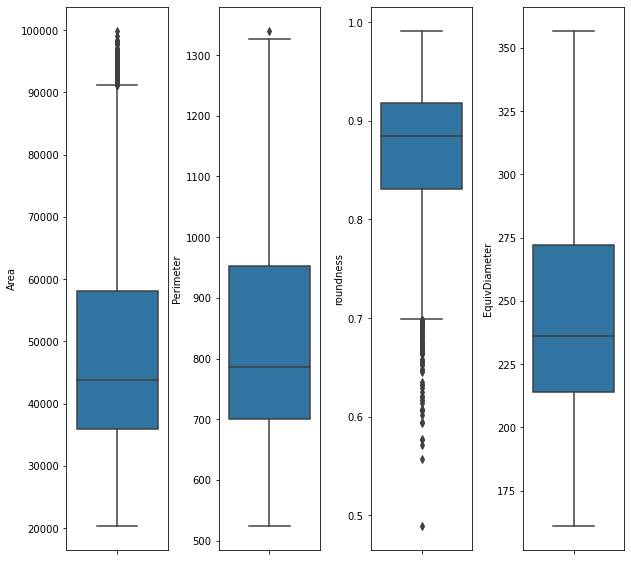

In [14]:
fig, ax = plt.subplots(1,4, figsize=(10, 10))
sns.boxplot(y=beans.Area, ax=ax[0])
sns.boxplot(y=beans.Perimeter, ax=ax[1])
sns.boxplot(y=beans.roundness, ax=ax[2])
sns.boxplot(y=beans.EquivDiameter, ax=ax[3])
plt.subplots_adjust(wspace=0.5)

##### What is the distribution of the Equivalent diameters

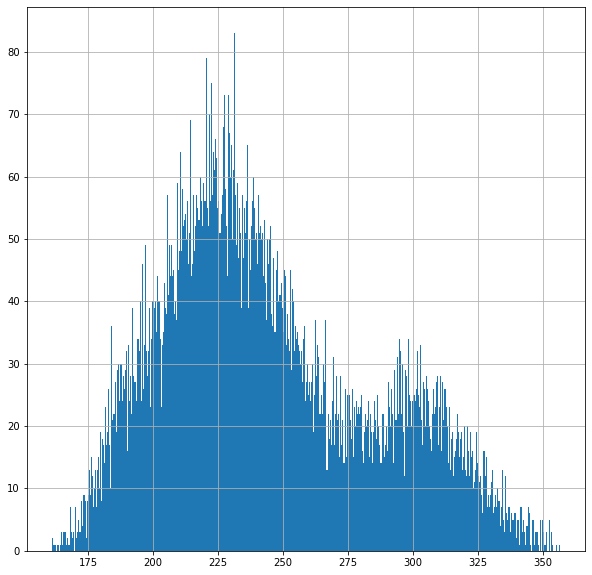

In [15]:
plt.figure(figsize=(10, 10))

plt.show(beans.EquivDiameter.hist(bins= 500))

###### It looks like the diameters are equally distributed

##### what is the frequency distribution of the areas ?

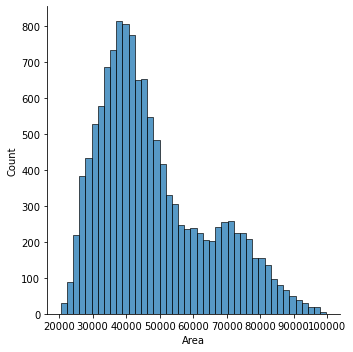

In [16]:
sns.displot(beans.Area)

##### What is the correlation between different values

<AxesSubplot:>

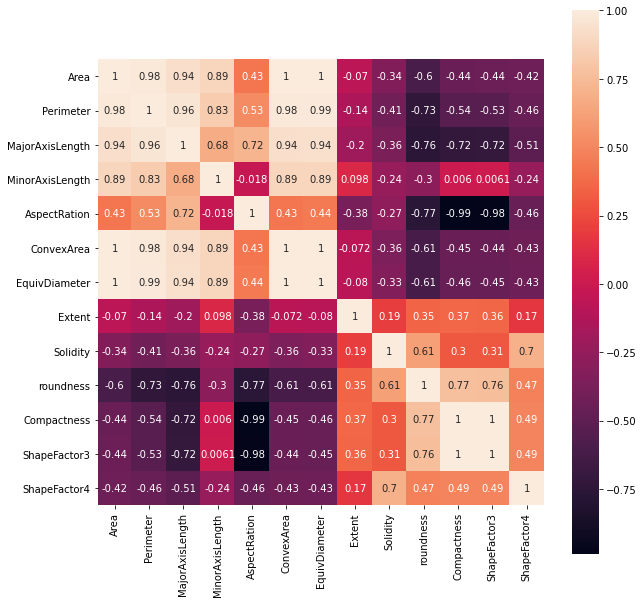

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(beans.corr(), annot=True, square=True)

##### Let's look relationship between all the pair and see where to apply a linear regration

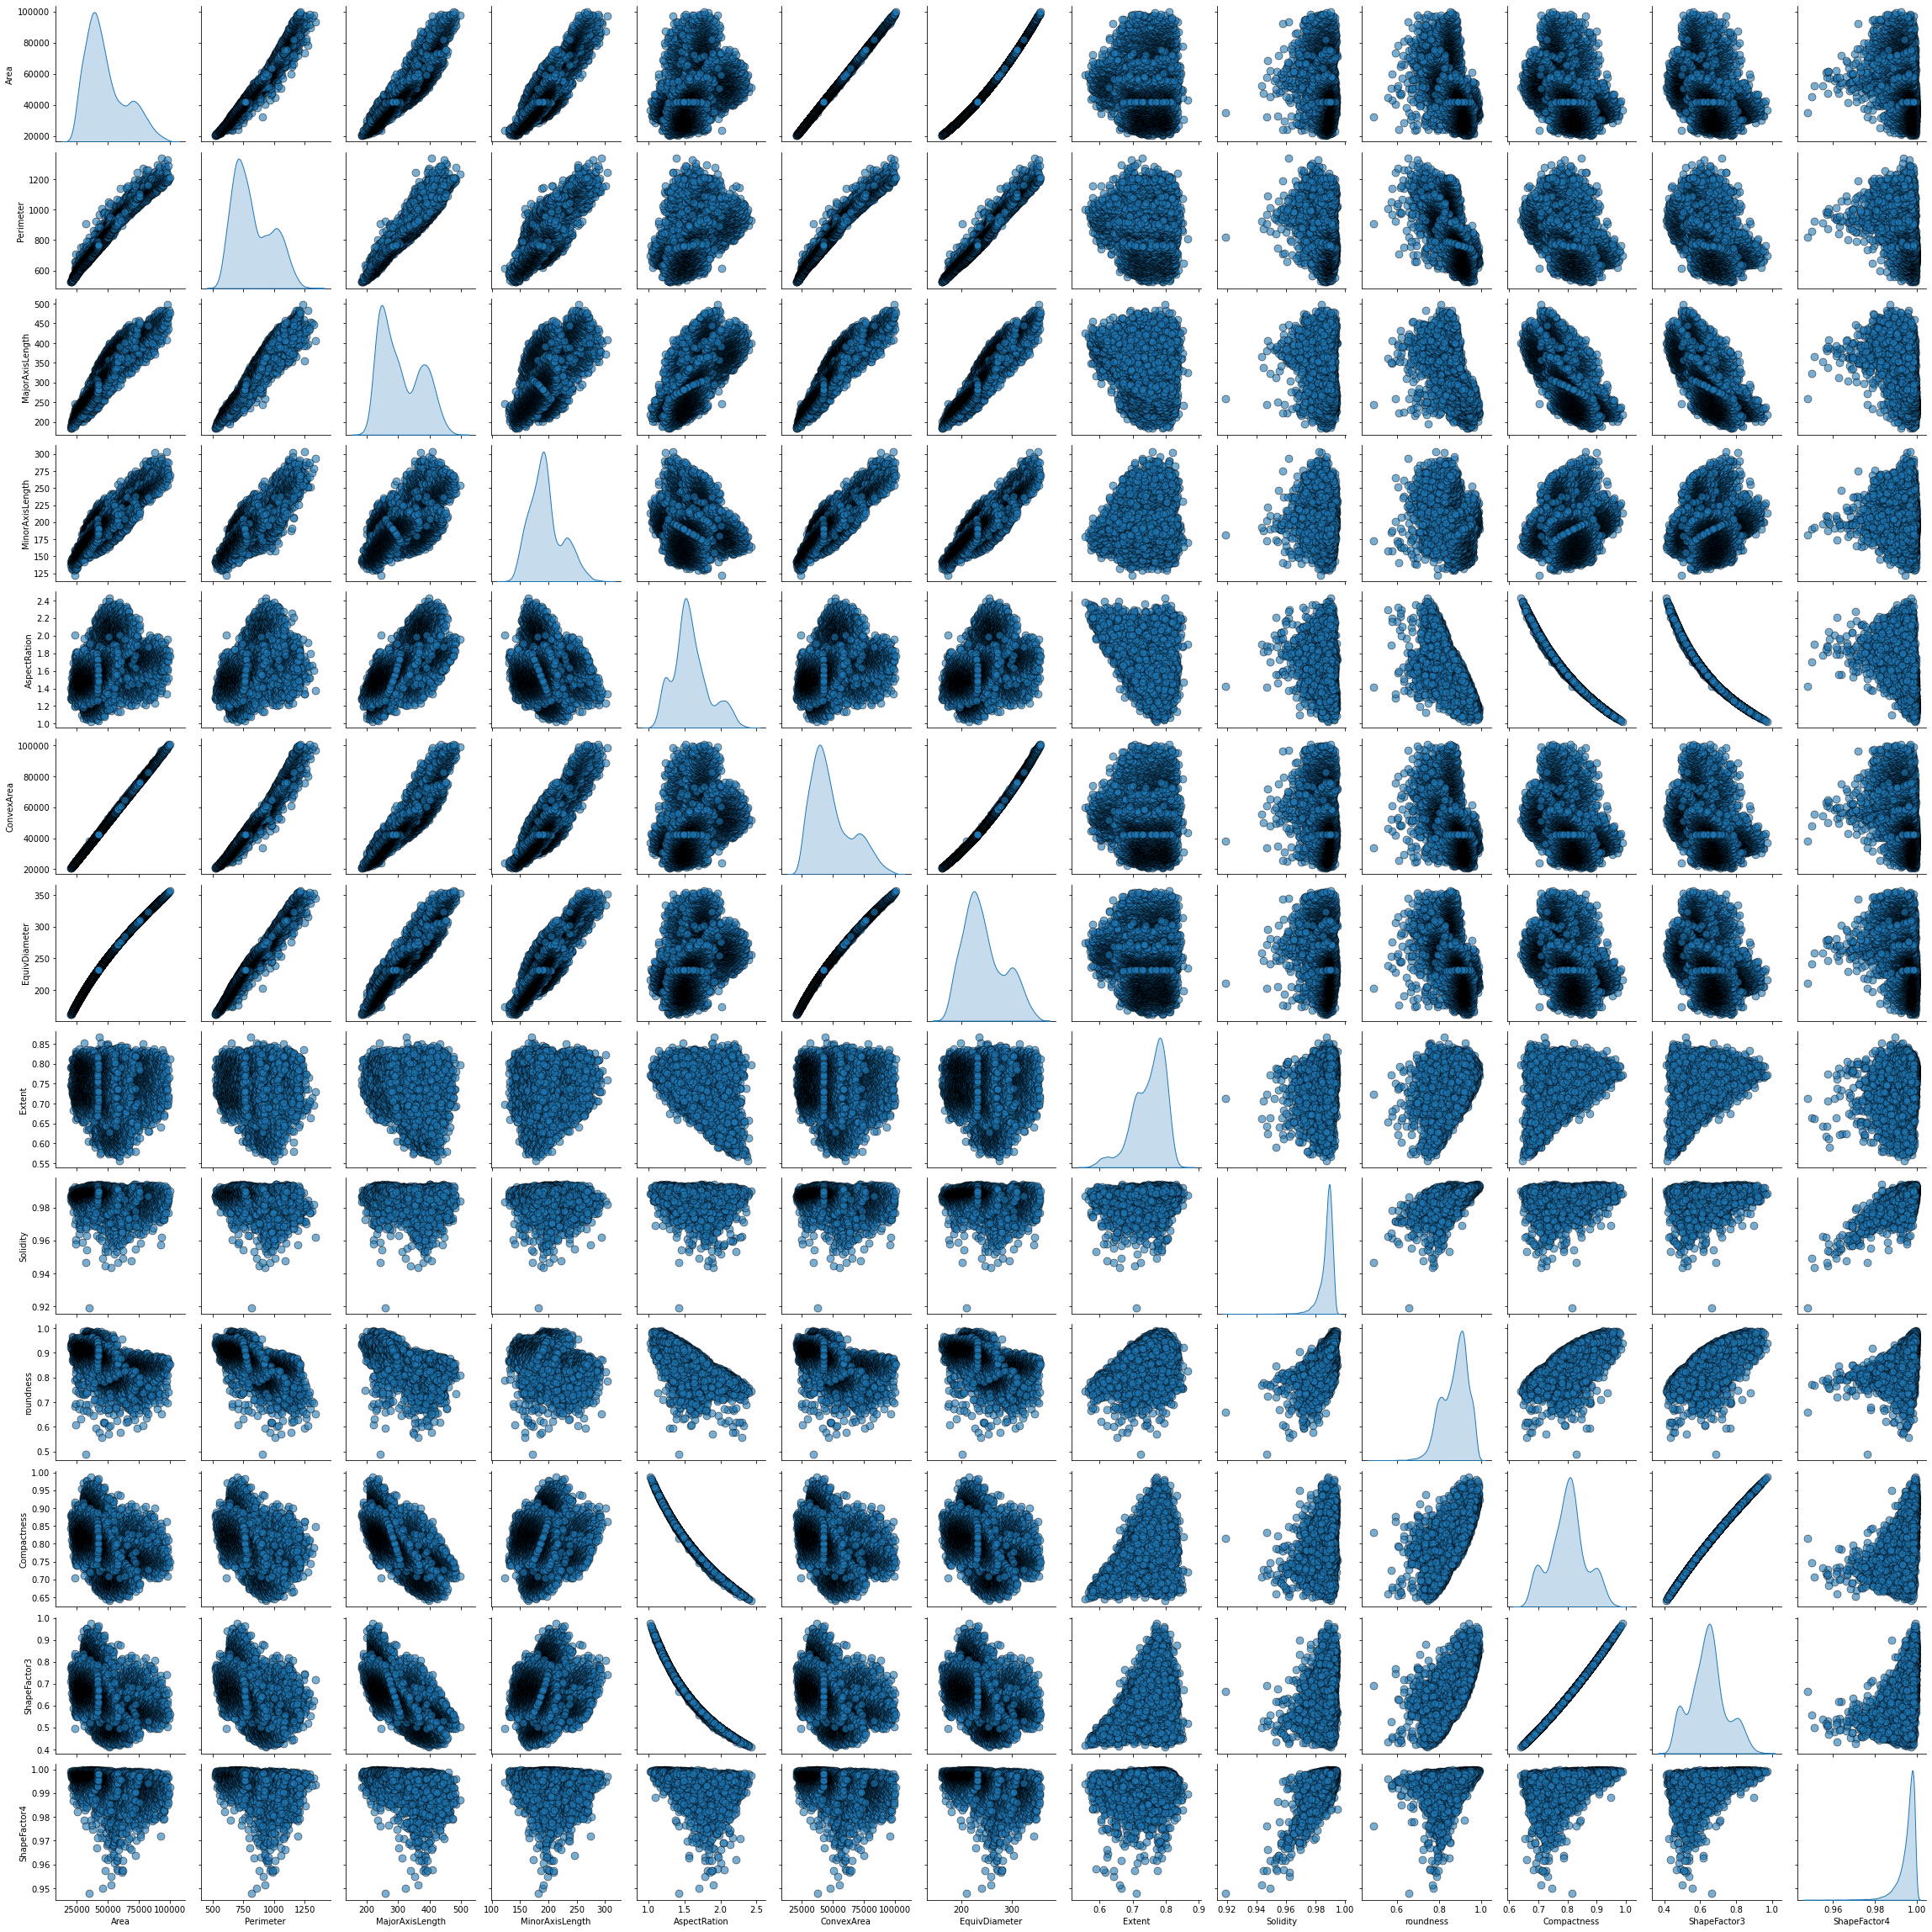

In [18]:
sns.pairplot(beans, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

##### Let's look at the linear regration now between the Aspect ratio and the perimiter

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AspectRation', ylabel='Perimeter'>

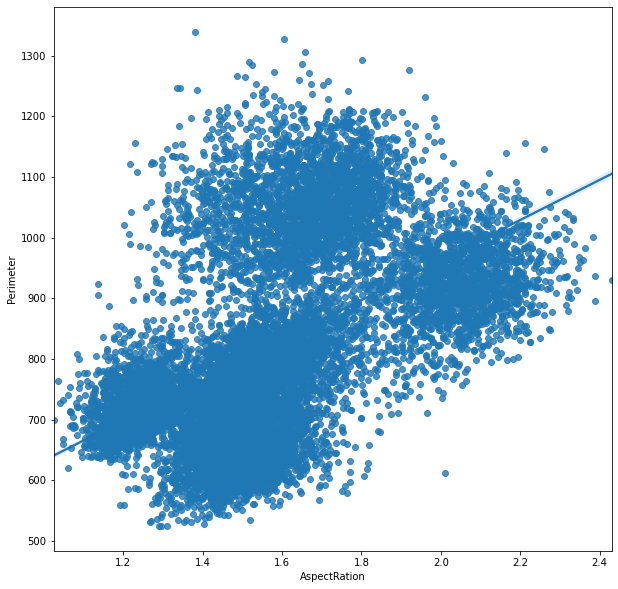

In [19]:
plt.figure(figsize=(10, 10))
sns.regplot(beans.AspectRation, beans.Perimeter, scatter=True)